# GRIP: The Sparks Foundation - Task 4


### Author: Sarang Khetre 

### Task4: Predicition Using Decision Tree Algorithm

### 1) Importing necessary Libraries

In [110]:
#imoorting libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



### 2) Importing dataset

In [111]:
iris = pd.read_csv('Iris.csv', index_col = 0)
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


 ### 3) Checking for null values

In [112]:
iris.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no null values

### 4) Checking the dataset

In [113]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [114]:
iris.shape

(150, 5)

In [115]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### 5) Performing Exploratory Data Analysis

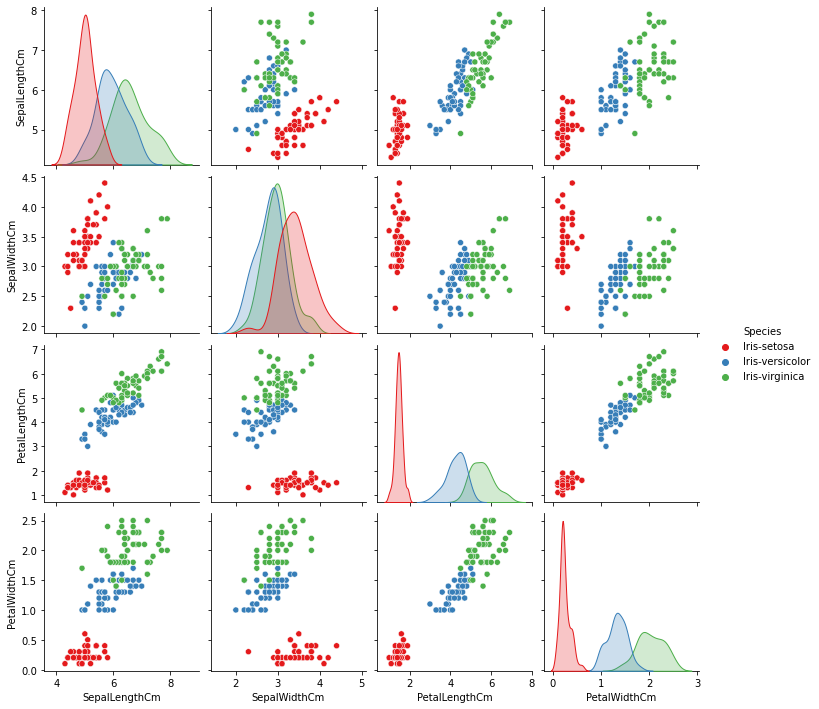

In [116]:
sns.pairplot(iris, hue = 'Species' , palette = 'Set1')

 Here we can clearly seperate the species "iris-setosa" as its cluster does not overlap with other two species

### 6) Splitting Data into Training and Testing 

In [117]:
from sklearn.model_selection import train_test_split

In [118]:
# X will contatin attributes (petal- width, length, sepal- width, length)
X = iris.drop('Species', axis =1)

# y contains target(Species)
y= iris['Species']

In [119]:
X.shape

(150, 4)

In [120]:
y.shape

(150,)

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [122]:
print('Shape of Training Data:', X_train.shape)
print('Shape of Testing Data :', X_test.shape)

Shape of Training Data: (105, 4)
Shape of Testing Data : (45, 4)


### Training the Decision Tree

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
dtree = DecisionTreeClassifier()

In [125]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

### Prediction and Evaluation

In [126]:
prediction = dtree.predict(X_test)

In [127]:
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
print(classification_report(y_test, prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.93      0.87      0.90        15
 Iris-virginica       0.88      0.94      0.91        16

       accuracy                           0.93        45
      macro avg       0.94      0.93      0.94        45
   weighted avg       0.93      0.93      0.93        45



In [129]:
print(confusion_matrix(y_test, prediction))

[[14  0  0]
 [ 0 13  2]
 [ 0  1 15]]


In [130]:
# Comparing actual vs predicted values
compare = pd.DataFrame({'Actual':y_test, 'Predicted': prediction})
compare.head(n=10)

,Actual,Predicted
Id,,
24,Iris-setosa,Iris-setosa
67,Iris-versicolor,Iris-versicolor
75,Iris-versicolor,Iris-versicolor
14,Iris-setosa,Iris-setosa
147,Iris-virginica,Iris-virginica
93,Iris-versicolor,Iris-versicolor
29,Iris-setosa,Iris-setosa
80,Iris-versicolor,Iris-versicolor
133,Iris-virginica,Iris-virginica


### Visualize the decsion tree

In [131]:
from sklearn.tree import plot_tree

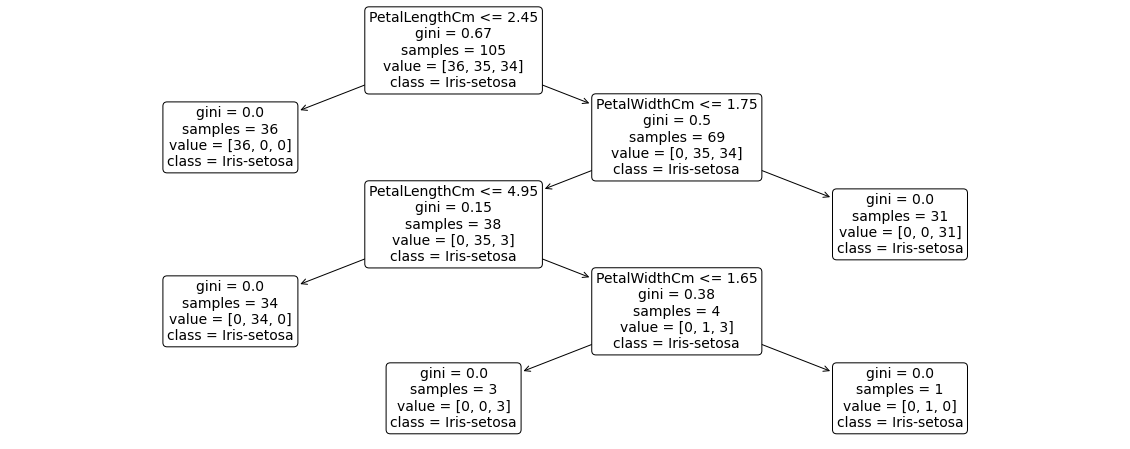

In [141]:
plt.figure(figsize=(20,8))
tree= plot_tree(dtree, feature_names= iris.columns, precision=2, rounded =True, class_names=y.values)